In [7]:
!pip install pandas
!pip install pandas_datareader
!pip install matplotlib
!pip install statsmodels
!pip install numpy
!pip install datetime
!pip install pandas_ta
!pip install yfinance
# !pip install warnings

In [6]:
### All package need

In [1]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings
warnings.filterwarnings('ignore')

# html에서 해당 값을 불러오는 pd.read_html
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

sp500['Symbol'] =sp500['Symbol'].str.replace('.','-')

symbols_list = sp500['Symbol'].unique().tolist()

end_date = '2023-09-27'

#현재 시간보다 8년 전 데이터까지의 범위 설정
start_date = pd.to_datetime(end_date) - pd.DateOffset(365*8)
start_date
df = yf.download(tickers = symbols_list,
                start = start_date,
                end=end_date)
df

[*********************100%%**********************]  503 of 503 completed


1 Failed download:
['VLTO']: Exception("%ticker%: Data doesn't exist for startDate = 1443499200, endDate = 1695787200")


Adj Close                                                 \
                     A        AAL        AAPL        ABBV        ABNB   
Date                                                                    
2015-09-29   31.588037  37.361622   24.748632   37.024628         NaN   
2015-09-30   32.140408  37.027863   25.030016   38.160835         NaN   
2015-10-01   31.588037  37.380695   24.866632   38.665813         NaN   
2015-10-02   32.458725  36.837151   25.048170   39.149742         NaN   
2015-10-05   33.085979  38.324738   25.138950   39.752907         NaN   
...                ...        ...         ...         ...         ...   
2023-09-20  112.243698  13.060000  175.490005  152.087677  138.009995   
2023-09-21  109.509209  13.060000  173.929993  151.909454  132.750000   
2023-09-22  111.185829  12.900000  174.789993  151.226303  132.199997   
2023-09-25  111.714767  12.910000  176.080002  153.117371  134.139999   
2023-09-26  110.507202  12.700000  171.960007  152.384705  132.279999   

                                                                      ...  \
                  ABT       ACGL         ACN        ADBE         ADI  ...   
Date                                                                  ...   
2015-09-29  33.807281  24.416668   84.097504   79.830002   45.767239  ...   
2015-09-30  34.423508  24.490000   85.542664   82.220001   47.765575  ...   
2015-10-01  34.885681  24.463333   85.699364   83.750000   46.520847  ...   
2015-10-02  35.416328  24.780001   86.526413   83.989998   47.155903  ...   
2015-10-05  35.424881  24.993334   88.467781   85.839996   48.629265  ...   
...               ...        ...         ...         ...         ...  ...   
2023-09-20  99.727936  81.320000  315.491486  535.780029  176.080002  ...   
2023-09-21  98.385368  80.290001  310.711334  513.880005  173.839996  ...   
2023-09-22  97.609665  80.959999  314.784424  512.900024  175.479996  ...   
2023-09-25  96.933411  81.150002  315.680695  511.600006  175.429993  ...   
2023-09-26  95.700241  81.260002  309.327057  506.299988  172.339996  ...   

              Volume                                                         \
                WYNN      XEL       XOM     XRAY      XYL      YUM      ZBH   
Date                                                                          
2015-09-29   6223400  3361700  13754400  1073500  1344100  6018857  2358906   
2015-09-30   4265300  2722000  18176500  1558100  1708500  7378142  2012723   
2015-10-01   4745600  2875200  14397800  1378600  1498600  4426718  1604019   
2015-10-02  15153700  3299500  18811300  1791800  1451100  7719772  1353626   
2015-10-05  12699700  5369400  18486700  2245000  2376800  5737736  1352081   
...              ...      ...       ...      ...      ...      ...      ...   
2023-09-20   1061300  7670600  11879900  1290100  1752100  1437200  1055900   
2023-09-21   2358400  4904800  14400600  2143400  2044800  1492700  1489200   
2023-09-22   2611300  4904300  13197300  3712600  1699800  1534100  1267300   
2023-09-25   1387800  3617800  11316000  1957800  1702000  1048500   886700   
2023-09-26   1454000  6275500  11805400  1827800  1322400  1500600  3610500   

                                      
              ZBRA     ZION      ZTS  
Date                                  
2015-09-29  895000  2958200  7328400  
2015-09-30  618800  3514200  4954100  
2015-10-01  464900  2795500  4131800  
2015-10-02  341500  3315700  4036800  
2015-10-05  460600  1924800  5467700  
...            ...      ...      ...  
2023-09-20  824900  1847200  1485500  
2023-09-21  676200  3054300  1691800  
2023-09-22  482200  2364000  1281800  
2023-09-25  314500  1370600  1551100  
2023-09-26  355400  1586100  1463200  

[2012 rows x 3018 columns]

In [2]:
save_df = df
df.stack()
df =df.stack()
df.index.names = ['date', 'ticker']
df.columns = df.columns.str.lower()

# setting the data formet
df

adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.588037   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361622   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.748632   27.264999   28.377501   26.965000   28.207500   
           ABBV     37.024628   52.790001   54.189999   51.880001   53.099998   
           ABT      33.807281   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     124.010002  124.010002  124.739998  123.449997  124.239998   
           ZBH     112.216316  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.990002   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.447540  176.869995  178.449997  176.270004  176.580002   

                        volume  
date       ticker               
2015-09-29 A         2252400.0  
           AAL       7478800.0  
           AAPL    293461600.0  
           ABBV     12842800.0  
           ABT      12287500.0  
...                        ...  
2023-09-26 YUM       1500600.0  
           ZBH       3610500.0  
           ZBRA       355400.0  
           ZION      1586100.0  
           ZTS       1463200.0  

[994088 rows x 6 columns]

# 2. Calculate features and technical indicators for each stock.

- Garman-Klass Colatility
- RSI
- Bollinger Bands
- ATR
- MACD
- Dollar Volume


In [3]:
df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*((np.log(df['adj close']) -np.log(df['open']))**2)

df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))
  
df

adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.588037   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361622   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.748632   27.264999   28.377501   26.965000   28.207500   
           ABBV     37.024628   52.790001   54.189999   51.880001   53.099998   
           ABT      33.807281   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     124.010002  124.010002  124.739998  123.449997  124.239998   
           ZBH     112.216316  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.990002   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.447540  176.869995  178.449997  176.270004  176.580002   

                        volume  garman_klass_vol        rsi  
date       ticker                                            
2015-09-29 A         2252400.0         -0.000854        NaN  
           AAL       7478800.0         -0.000443        NaN  
           AAPL    293461600.0         -0.005307        NaN  
           ABBV     12842800.0         -0.049280        NaN  
           ABT      12287500.0         -0.008237        NaN  
...                        ...               ...        ...  
2023-09-26 YUM       1500600.0          0.000053  36.057176  
           ZBH       3610500.0          0.000224  31.893246  
           ZBRA       355400.0          0.000133  29.494977  
           ZION      1586100.0          0.000307  46.707773  
           ZTS       1463200.0          0.000075  42.623482  

[994088 rows x 8 columns]

<Axes: xlabel='date'>

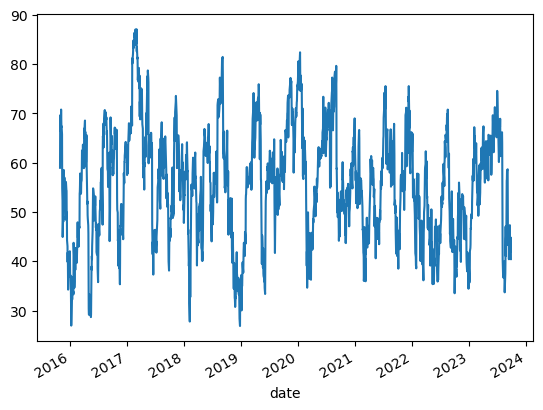

In [4]:
df.xs('AAPL', level=1)['rsi'].plot()

In [5]:
df['bb_low'] = df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:, 0])

df['bb_mid'] = df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:, 1])

df['bb_high'] = df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:, 2])
df

adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.588037   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361622   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.748632   27.264999   28.377501   26.965000   28.207500   
           ABBV     37.024628   52.790001   54.189999   51.880001   53.099998   
           ABT      33.807281   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     124.010002  124.010002  124.739998  123.449997  124.239998   
           ZBH     112.216316  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.990002   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.447540  176.869995  178.449997  176.270004  176.580002   

                        volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2015-09-29 A         2252400.0         -0.000854        NaN       NaN   
           AAL       7478800.0         -0.000443        NaN       NaN   
           AAPL    293461600.0         -0.005307        NaN       NaN   
           ABBV     12842800.0         -0.049280        NaN       NaN   
           ABT      12287500.0         -0.008237        NaN       NaN   
...                        ...               ...        ...       ...   
2023-09-26 YUM       1500600.0          0.000053  36.057176  4.826202   
           ZBH       3610500.0          0.000224  31.893246  4.751923   
           ZBRA       355400.0          0.000133  29.494977  5.400991   
           ZION      1586100.0          0.000307  46.707773  3.539073   
           ZTS       1463200.0          0.000075  42.623482  5.161192   

                     bb_mid   bb_high  
date       ticker                      
2015-09-29 A            NaN       NaN  
           AAL          NaN       NaN  
           AAPL         NaN       NaN  
           ABBV         NaN       NaN  
           ABT          NaN       NaN  
...                     ...       ...  
2023-09-26 YUM     4.856171  4.886139  
           ZBH     4.791592  4.831260  
           ZBRA    5.539167  5.677342  
           ZION    3.594527  3.649982  
           ZTS     5.220007  5.278822  

[994088 rows x 11 columns]

In [6]:
pandas_ta.atr(high=df['high'],
             low = df['low'],
             close = df['close'],
             length=14)

date        ticker
2015-09-29  A                NaN
            AAL              NaN
            AAPL             NaN
            ABBV             NaN
            ABT              NaN
                         ...    
2023-09-26  YUM        98.580840
            ZBH        92.367209
            ZBRA       93.925979
            ZION      100.796981
            ZTS       103.915768
Name: ATRr_14, Length: 994088, dtype: float64

In [12]:
# Error code
# def compute_atr(stock_data):
#     atr = pandas_ta.atr(high=df['high'],
#                  low = df['low'],
#                  close = df['close'],
#                  length=14)
#     return atr.sub(atr.mean()).div(atr.std())

# df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)

# def compute_macd(close):
#     macd = pandas_ta.macd(close=close, length=10).iloc[:, 0]
#     return macd.sub(macd.mean()).div(macd.std())


# df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)
# ______________________________



df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*((np.log(df['adj close'])-np.log(df['open']))**2)

df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))

df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])
                                                          
df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])
                                                          
df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])

def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['high'],
                        low=stock_data['low'],
                        close=stock_data['close'],
                        length=14)
    return atr.sub(atr.mean()).div(atr.std())

df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)

def compute_macd(close):
    macd = pandas_ta.macd(close=close, length=20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())

df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)

df['dollar_volume'] = (df['adj close']*df['volume'])/1e6

df

adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.588037   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361622   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.748632   27.264999   28.377501   26.965000   28.207500   
           ABBV     37.024628   52.790001   54.189999   51.880001   53.099998   
           ABT      33.807281   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     124.010002  124.010002  124.739998  123.449997  124.239998   
           ZBH     112.216316  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.990002   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.447540  176.869995  178.449997  176.270004  176.580002   

                        volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2015-09-29 A         2252400.0         -0.000854        NaN       NaN   
           AAL       7478800.0         -0.000443        NaN       NaN   
           AAPL    293461600.0         -0.005307        NaN       NaN   
           ABBV     12842800.0         -0.049280        NaN       NaN   
           ABT      12287500.0         -0.008237        NaN       NaN   
...                        ...               ...        ...       ...   
2023-09-26 YUM       1500600.0          0.000053  36.057176  4.826202   
           ZBH       3610500.0          0.000224  31.893246  4.751923   
           ZBRA       355400.0          0.000133  29.494977  5.400991   
           ZION      1586100.0          0.000307  46.707773  3.539073   
           ZTS       1463200.0          0.000075  42.623482  5.161192   

                     bb_mid   bb_high       atr      macd  dollar_volume  
date       ticker                                                         
2015-09-29 A            NaN       NaN       NaN       NaN      71.148896  
           AAL          NaN       NaN       NaN       NaN     279.420098  
           AAPL         NaN       NaN       NaN       NaN    7262.773271  
           ABBV         NaN       NaN       NaN       NaN     475.499888  
           ABT          NaN       NaN       NaN       NaN     415.406971  
...                     ...       ...       ...       ...            ...  
2023-09-26 YUM     4.856171  4.886139  0.142547 -1.363696     186.089409  
           ZBH     4.791592  4.831260 -0.381708 -0.881067     405.157010  
           ZBRA    5.539167  5.677342 -0.057389 -1.600791      79.595386  
           ZION    3.594527  3.649982 -0.161699 -0.164625      53.911542  
           ZTS     5.220007  5.278822  0.651515 -1.188278     258.178041  

[994088 rows x 14 columns]

# 3. Aggregate to monthly level and filter top 150 most liquid stocks for each month.

 - To reduce tradining time and experiment with features and strategies, we convert the business-daily data to month-end frequency.
 

In [20]:
# last_cols = [c for c in df.columns.unique(0) if c not in ['dollar_volume', 'volume', 'open', 'high', 'low', 'close']]
# last_cols

data=pd.concat([df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'),
df.unstack()[last_cols].resample('M').last().stack('ticker')],axis=1)

In [26]:
# data['dollar_volume'] = (data['dollar_volume'].unstack('ticker').rolling(5*12).mean().stack())
data